# Lista 07 - Comparando Classificadores

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Logística Regularizada para **pelo menos um** dos conjuntos de dados abaixo:

* [Avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
* [Avaliação de vinhos](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Resultados de partidas do jogo Dota](http://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results) (desafiador!)

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Reporte a precisão, revocação, F1 e a matriz de confusão

Como já estamos no fim da matéria, você pode agora fazer uso da biblioteca scikit-learn. Afinal, no dia a dia, não implementamos tudo do zero. Abaixo temos os imports que vocês precisam. Leiam a API da biblioteca para saber como fazer uso da mesma.

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier

# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
copy = df.copy()

y = copy['quality']
del copy['quality']
X = copy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_nTest = (X_test - X_train.mean()) / X_train.std(ddof=1)
X_nTrain = scaler.fit_transform(X_train)

In [7]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(2, 50)}

knn = GridSearchCV(knn, param_grid, cv=3)

knn.fit(X_nTrain, y_train)

knn.best_params_

{'n_neighbors': 25}

In [8]:
from sklearn.metrics import classification_report

model_knn = KNeighborsClassifier(n_neighbors=23)
model_knn.fit(X_nTrain, y_train)

print(classification_report(y_test, model_knn.predict(X_nTest)))
model_knn.predict(X_nTest)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        28
           5       0.55      0.60      0.57       275
           6       0.53      0.67      0.59       432
           7       0.55      0.35      0.43       196
           8       0.00      0.00      0.00        46

    accuracy                           0.54       980
   macro avg       0.27      0.27      0.27       980
weighted avg       0.50      0.54      0.51       980



/home/gprimate/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([6, 5, 7, 6, 6, 5, 7, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       5, 6, 5, 5, 7, 6, 7, 6, 6, 5, 5, 7, 5, 7, 6, 5, 6, 6, 6, 7, 6, 6,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 5, 5,
       6, 7, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7, 6,
       6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5, 6, 7, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 7, 5, 6, 7, 5, 5, 6, 6, 6, 7,
       6, 6, 7, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 7, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6,
       6, 7, 7, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 7, 5, 7, 7, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 7, 5, 6, 7, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6, 6,
       5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5,

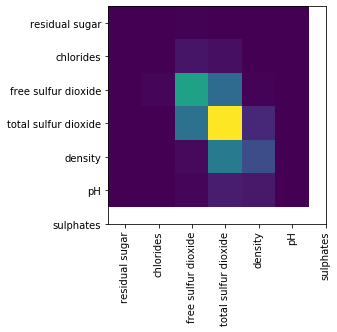

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


labels = pd.Series(df.columns.values[3:10])

plt.imshow(confusion_matrix(y_test, model_knn.predict(X_nTest)))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)           
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegressionCV

In [11]:
model_log = LogisticRegressionCV(Cs=100, penalty='l2', cv=3, fit_intercept=False, multi_class='ovr')
model_log.fit(X_nTrain, y_train)

print(classification_report(y_test, model_log.predict(X_nTest)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.07      0.11      0.09        28
           5       0.51      0.76      0.61       275
           6       0.55      0.23      0.32       432
           7       0.36      0.65      0.47       196
           8       0.00      0.00      0.00        46

    accuracy                           0.44       980
   macro avg       0.25      0.29      0.25       980
weighted avg       0.46      0.44      0.41       980



/home/gprimate/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


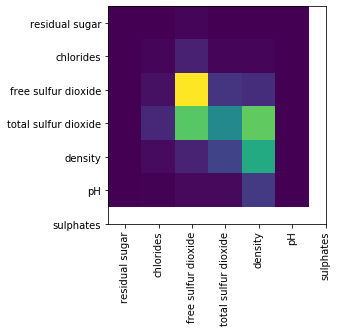

In [12]:
plt.imshow(confusion_matrix(y_test, model_log.predict(X_nTest)))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)           
plt.show()

Explique e discuta sobre os resultados encontrados no campo abaixo.

Percebe-se que a base de dados não é bem comportada, ou seja, as previsões não foram muito boas.

Muitas das colunas, tanto no KNN como na regressão logística foram consideradas como zero, nem apareceram no classification report.

Com tudo isso, parece que em ambos os casos os atributos 'free sulfur dioxide', 'total sulfur dioxide' e 'density' obtiveram os melhores F1-scores.

As matrizes de confusão confirmam exatamente isso.